# Exp 1: Basic Operations and Algebraic Operators for Digital Images #
## 1.	Aims ##

#### 1. Establish a Python environment and install some digital image processing libraries such as scikit-image, OpenCV, PIL, and matplotlib.

#### 2. Learn how to load, display, and save images.
    
#### 3. Be familiar with some basic image processing operations such as adding noise, image type conversion, image file format conversion, etc.

#### 4. Learn how to perform algebraic operations on digital images.

## 2.	Steps and Requirements

### (1) Load, Save and Display Images.	
(a) Load a PNG image (<font style="color:red;">'images/bunny.png'</font>) with Scikit-Image. (<font style="color:blue;">Tips: ``io.imread``</font>) 

(b) Convert it to PIL image format. (<font style="color:blue;">Tips: ``Image.fromarray``</font>) 

(c) Display this image with Matplotlib. (<font style="color:blue;">Tips: ``pyplot.imshow``</font>) 

(d) Convert PIL image format to OpenCV image format, save it as a JPEG image with the quality factor of 90. (<font style="color:blue;">Tips: ``cv2.imwrite``</font>)

(e) Load the JPEG image saved above, and save it as a BMP format and a TIFF format image, respectively.

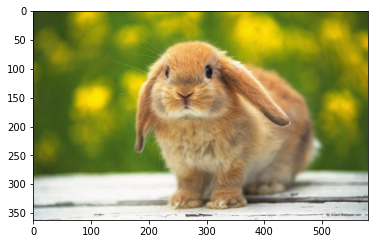

The image shape of Scikit-Image format:  (362, 580, 4)
The image shape of PIL format:  (580, 362)
The image shape of OpenCV format:  (362, 580, 4)

The values in channel 4: 
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


True

In [1]:
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load
img1 = io.imread('./images/bunny.png')

# Convert to PIL image format
ski2pil = Image.fromarray(img1)

# Display
plt.figure()
plt.imshow(img1)
plt.show()

# Convert to OpenCV image format
pil2cv = np.array(ski2pil)

# Size
print('The image shape of Scikit-Image format: ', img1.shape)
print('The image shape of PIL format: ', ski2pil.size)
print('The image shape of OpenCV format: ', pil2cv.shape)
print('\nThe values in channel 4: \n', img1[:, :, 3])

# Save
# Convert the format to BGR
cv = cv2.cvtColor(pil2cv, cv2.COLOR_RGBA2BGR)
cv2.imwrite('./results/1.jpg', cv, [cv2.IMWRITE_JPEG_QUALITY, 90])

# Load and save
img2 = cv2.imread('./results/1.jpg')
cv2.imwrite('./results/2.bmp', img2, [cv2.IMWRITE_JPEG_QUALITY, 90])
cv2.imwrite('./results/3.tiff', img2, [cv2.IMWRITE_JPEG_QUALITY, 90])

### I found that:

The image has **<font color='red'>four</font>** channels!

By searching online, I finally learned that 'png' format image will store an Alpha channel in addition to RGB channels, which is used as a transparency parameter.

Check the value of its fourth channel, the Alpha channel. I found that all its values are 255, which means it is not transparent.

Therefore, when saving with OpenCV, it is necessary to convert the original RGBA format to BGR format first in order to store it correctly.

### (2)	Display Three Individual Color Components of RGB Images. 
(a) Load an image with OpenCV. 

(b) Display the R, G, and B color component of the image, respectively. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure. 

(c) Answer the question: What are the differences between the RGB image and the R/G/B components?

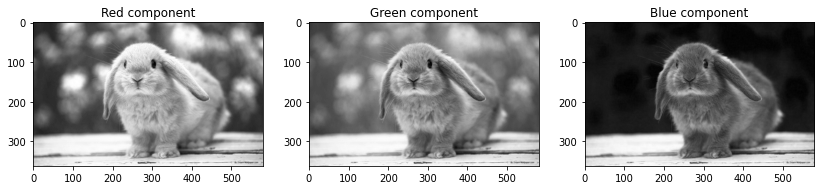

In [2]:
img3 = cv2.imread('./images/bunny.png')

# Spilt color components
(b, g, r) = cv2.split(img3)

# Red component
plt.figure(figsize = [14, 4])
plt.subplot(1, 3, 1)
plt.title('Red component')
plt.imshow(r, cmap='gray')

# Green component
plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Green component')

# Blue component
plt.subplot(1, 3, 3)
plt.imshow(b, cmap='gray')
plt.title('Blue component')
plt.show()

### (3)	Convert Color Image to Grayscale. 

(a) Display the original Lena image and the grayscale images obtained by three grayscaling methods in the same figure. Add the corresponding title. 1)Maximum of the three components; 2) The average of the three components; 3) gray=0.30*r + 0.59*g + 0.11*b.

(b) Answer the question: What are their differences?

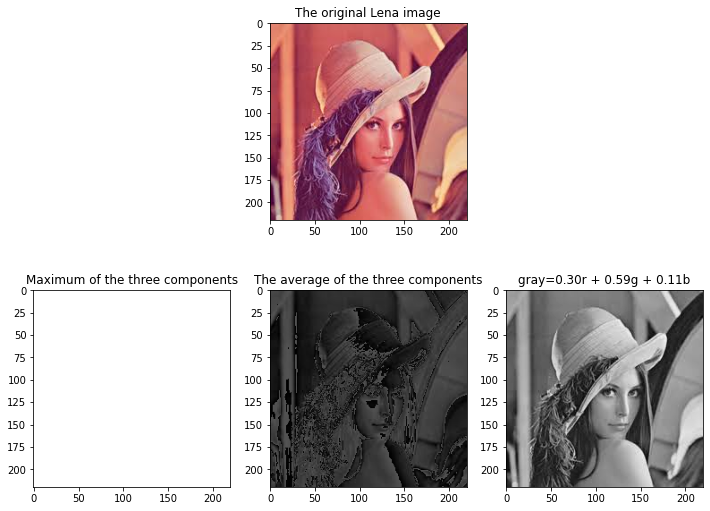

In [3]:
import copy

img4 = cv2.imread('./images/lena.jpg')

# Spilt color components
(b, g, r) = cv2.split(img4)

# Original
plt.figure(figsize = [12, 9])
plt.subplot(2, 3, 2)
plt.title('The original Lena image')
plt.imshow(cv2.merge([r, g, b]))

# Maximum
r1 = copy.deepcopy(r)
g1 = copy.deepcopy(g)
b1 = copy.deepcopy(b)
for i in r1, g1, b1:
    i[:][:] = 255
    
plt.subplot(2, 3, 4)
plt.title('Maximum of the three components')
plt.imshow(cv2.merge([r1, g1, b1]))

# Average
avg = (r + g + b)/3
r2 = copy.deepcopy(r)
g2 = copy.deepcopy(g)
b2 = copy.deepcopy(b)
for i in r2, g2, b2:
    i[:][:] = avg
    
plt.subplot(2, 3, 5)
plt.title('The average of the three components')
plt.imshow(cv2.merge([r2, g2, b2]))

# Specified
val = 0.30*r + 0.59*g + 0.11*b
plt.subplot(2, 3, 6)
plt.title('gray=0.30r + 0.59g + 0.11b')
plt.imshow(val, cmap='gray')
plt.show()

### (4)	Image Cropping. 

(a) Load an RGB image ('images/lena.jpg'). 

(b) Select the 128x128 central region of the image. 

(c) Display the full image and its central part. 

(d) Save the central part as an image file in the same format as the full-size image.

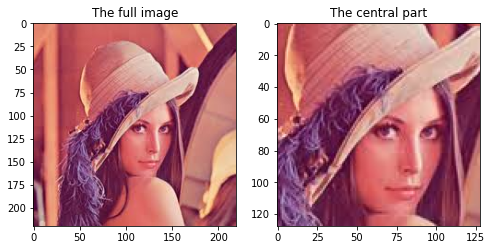

In [4]:
img5 = io.imread('./images/lena.jpg')

# Determine the boundary
x1 = int((img5.shape[1] - 128) / 2)
y1 = int((img5.shape[0] - 128) / 2)
x2 = x1 + 128
y2 = y1 + 128

# Cropping
roi = img5[y1:y2, x1:x2, :]

plt.figure(figsize = [8, 4])
plt.subplot(1, 2, 1)
plt.title('The full image')
plt.imshow(img5)

plt.subplot(1, 2, 2)
plt.title('The central part')
plt.imshow(roi)
plt.show()

# Save
io.imsave('./results/4.jpg', roi)

### (5)	Adding Noise to Image. 

(a) Load an RGB image with Scikit-Image ('images/lena.jpg').

(b) Add 1) Gaussian noise, 2) salt noise, 3) pepper noise, 4) salt&pepper noise, and 5) speckle noise to it. The parameters can be chosen by yourself. (<font style="color:blue;">Tips: You may use ``random_noise`` in the ``util`` module of Scikit-Image</font>)

(c) Display these six images (including the original noiseless image) in the same figure and add the corresponding title.

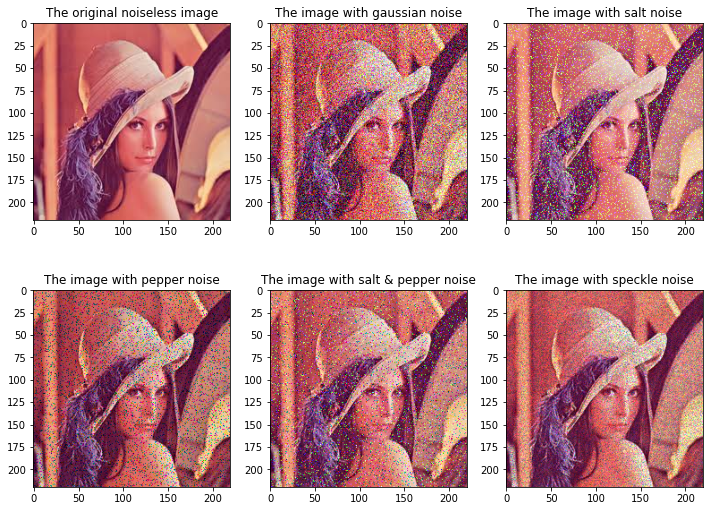

In [5]:
from skimage import util

img6 = io.imread('./images/lena.jpg')

# Original
plt.figure(figsize = [12, 9])
plt.subplot(2, 3, 1)
plt.title('The original noiseless image')
plt.imshow(img6)

# Gaussian noise
img_gs = util.random_noise(img6, mode = 'gaussian', mean=0, var=0.05)
plt.subplot(2, 3, 2)
plt.title('The image with gaussian noise')
plt.imshow(img_gs)

# Salt noise
img_salt = util.random_noise(img6, mode = 'salt', amount=0.1)
plt.subplot(2, 3, 3)
plt.title('The image with salt noise')
plt.imshow(img_salt)

# Pepper noise
img_pepper = util.random_noise(img6, mode = 'pepper', amount=0.1)
plt.subplot(2, 3, 4)
plt.title('The image with pepper noise')
plt.imshow(img_pepper)

# Salt & pepper noise
img_s_p = util.random_noise(img6, mode = 's&p', amount=0.1, salt_vs_pepper=0.5)
plt.subplot(2, 3, 5)
plt.title('The image with salt & pepper noise')
plt.imshow(img_s_p)

# Speckle noise
img_sk = util.random_noise(img6, mode = 'speckle', mean=0, var=0.05)
plt.subplot(2, 3, 6)
plt.title('The image with speckle noise')
plt.imshow(img_sk)
plt.show()

### (6)	Image Denoising by Averaging. 

(a) Load an RGB image. 

(b) Add Gaussian noise with a mean value of 0 and a variance of 0.1 to it. 

(c) Display and compare the images before and after adding noise. 

(d) Use the ``for`` loop to add 3, 30, and 300 images with random Gaussian noise and find their average value, respectively. 

(e) Display these averaged images in the same figure. Add corresponding titles, and compare the results.

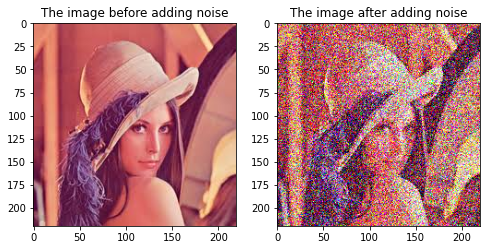

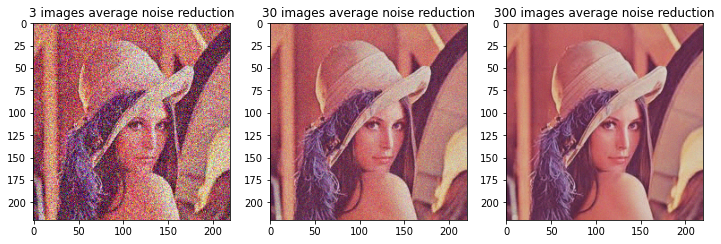

In [6]:
img7 = io.imread('./images/lena.jpg')

# Gaussian noise
img_gs = util.random_noise(img7, mode = 'gaussian', mean=0, var=0.1)

# Display
plt.figure(figsize = [8, 4])
plt.subplot(1, 2, 1)
plt.title('The image before adding noise')
plt.imshow(img7)

plt.subplot(1, 2, 2)
plt.title('The image after adding noise')
plt.imshow(img_gs)
plt.show()

# 3 average
total_3 = img7 - img7
for i in range(1, 4):
    exec('img_gs_%iof3 = util.random_noise(img7, mode = \'gaussian\', mean=0, var=0.1)' % i)
    exec('total_3 = total_3 + img_gs_%iof3' % i)
avg_3 = total_3 / 3

# 30 average
total_30 = img7 - img7
for i in range(1, 31):
    exec('img_gs_%iof30 = util.random_noise(img7, mode = \'gaussian\', mean=0, var=0.1)' % i)
    exec('total_30 = total_30 + img_gs_%iof30' % i)
avg_30 = total_30 / 30

# 300 average
total_300 = img7 - img7
for i in range(1, 301):
    exec('img_gs_%iof300 = util.random_noise(img7, mode = \'gaussian\', mean=0, var=0.1)' % i)
    exec('total_300 = total_300 + img_gs_%iof300' % i)
avg_300 = total_300 / 300

plt.figure(figsize = [12, 4])
plt.subplot(1, 3, 1)
plt.title('3 images average noise reduction')
plt.imshow(avg_3)

plt.subplot(1, 3, 2)
plt.title('30 images average noise reduction')
plt.imshow(avg_30)

plt.subplot(1, 3, 3)
plt.title('300 images average noise reduction')
plt.imshow(avg_300)
plt.show()

### (7)	Image Algebraic Operations. 

(a) Download two pictures by yourself, and load these two pictures with OpenCV. 

(b) Perform algebraic operations of addition and subtraction (<font style="color:blue;">Tips : Pay attention to the size and type of the image during the calculation. If they are different, the larger image should be cropped or scaled</font>).

(c) Display the images before and after processing.

1:  (720, 1080, 3)
2:  (720, 1080, 3)


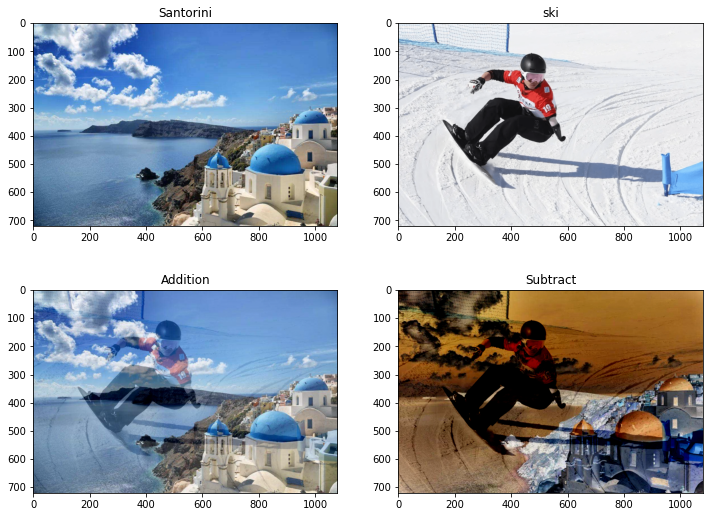

In [7]:
img8 = cv2.imread('./images/Santorini.jpeg')
img9 = cv2.imread('./images/ski.jpeg')
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)
img9 = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)

# Check size
print('1: ', img8.shape)
print('2: ', img9.shape)

# Original
plt.figure(figsize = [12, 9])
plt.subplot(2, 2, 1)
plt.title('Santorini')
plt.imshow(img8)
plt.subplot(2, 2, 2)
plt.title('ski')
plt.imshow(img9)

# Addition
add = cv2.addWeighted(img8, 0.8, img9, 0.4, -50)
plt.subplot(2, 2, 3)
plt.title('Addition')
plt.imshow(add)

# Subtract
sub = cv2.subtract(img9, img8)
plt.subplot(2, 2, 4)
plt.title('Subtract')
plt.imshow(sub)
plt.show()

### (8)	Text adding. 

(a) Load the Lena image with OpenCV. 

(b) Employ a red rectangle to mark the 64x64 rectangle in the middle of image. (<font style="color:blue;">Tips: You may use ``cv2.rectangle``</font>) 

(c) Adding some black text on it. (<font style="color:blue;">Tips: You may use``cv2.putText``</font>). An example of the generated result is shown in the figure below.
 
![lena.jpg](./images/exp1_8.png) 
<center><font style="color:red;">** Figure 1. The result of adding content to Lean image** </font></center>

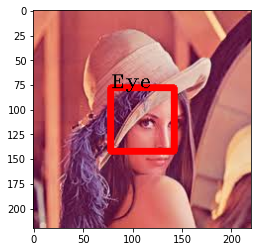

In [8]:
img10 = cv2.imread('./images/lena.jpg')
img10 = cv2.cvtColor(img10, cv2.COLOR_BGR2RGB)

# Determine the position
x1 = int((img5.shape[1] - 64) / 2)
y1 = int((img5.shape[0] - 64) / 2)
x2 = x1 + 64
y2 = y1 + 64

# Mark with a red rectangle
cv2.rectangle(img10, (x1, y1), (x2, y2), color = (255, 0, 0), thickness = 5)

# Add text
cv2.putText(img10, 'Eye', (x1, y1), fontFace = cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale = 1, color = (0, 0, 0))

plt.figure()
plt.imshow(img10)
plt.show()

### (9)	Adding image mask. 

(a) Load the Lena image with OpenCV. 

(b) Adding a circular mask on the Lena image. (<font style="color:blue;">Tips: You may use``numpy.ogrid``</font>). An example of the generated result is shown in the figure below.
 
![lena.jpg](./images/exp1_9.png) 
<center><font style="color:red;">** Figure 2. The result of adding binary mask to Lean image** </font></center>

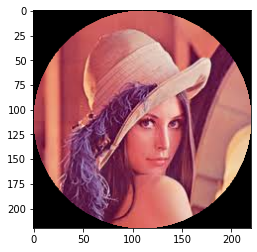

In [9]:
img11 = cv2.imread('./images/lena.jpg')
img11 = cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)

# Get the image shape
h, w, ch = img11.shape
# Creat two numpy arrays representing two axis variables
Y, X = np.ogrid[0:h, 0:w]
# Assign the points outside the circle to True 
mask = (X - w/2)**2 + (Y - h/2)**2 > w * h / 4
# Replace them with black
img11[mask, :] = 0

plt.figure()
plt.imshow(img11)
plt.show()

### (10)	Capture Images by Laptop Camera with OpenCV. (``Bonus Task``)

(a) Read the video stream from the laptop camera.(For more details check [this](http://www.1zlab.com/wiki/python-opencv-tutorial/opencv-read-usb-camera-image/)) 

(b) Implement Time-lapse photography.(It can be used to record the whole process of the evaporation of water droplets in the cup. <font style="color:blue;"> Tips: You may use``time.sleep``</font>)

(c) Generate corresponding MP4 video or GIF image.

**<font size=10 color='red'>!!! ATTENTION !!!</font>**

**<font color='red'>Once running the following code, if the laptop has a camera, time-lapse photography will begin!</font>**

If you want to end the capture, select the camera window and press **Esc.**

The video will be stored in the current folder after processing.

In [10]:
import os
from datetime import datetime
import sys

# Create a folder in the current directory to save capture images
date_time = datetime.now().strftime('%Y-%m-%d  %H . %M . %S')
if not os.path.exists(date_time):
    os.mkdir(date_time)

# Enabling the camera
cap = cv2.VideoCapture(0)
cv2.namedWindow('camera',flags=cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO | cv2.WINDOW_GUI_EXPANDED)

# Check the camera
if not cap.isOpened():
    print('\nFailed to enable the camera!\nSomething wrong with your camera!')
    sys.exit()

# Get the width and height of images
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Set a flag to determine whether to capture
flag = 0
# Begin capturing
while True:
    flag += 1
    # Load the captured image continuously
    ret, frame = cap.read()
    # Check the frame
    if not ret:
        print('\nFailed to capture!\nSomething wrong with your camera!')
        sys.exit()
        
    # Display on the screen
    cv2.imshow('camera', frame)
    # Wait for 1 ms
    key = cv2.waitKey(1)
    
    # About once every 1s
    if flag % 30 == 1:
        # Named by time and save
        now_time = datetime.now().strftime('%Y-%m-%d__%H . %M . %S')
        path = './' + date_time + '/' + now_time + '.jpg'
        cv2.imwrite(path, frame)

    # Press Esc (27 in ASCII) to end
    if key == 27:
        break
    
# End capturing
cap.release()
cv2.destroyAllWindows()

# Calculate the images number
images = sorted(os.listdir(date_time))
num = len(images)
print('Total captured images: ', num)

# Specify the video encoder
fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
# Creat a video writer
video = cv2.VideoWriter(f'./{date_time}.mp4', fourcc=fourcc, fps=5, frameSize=(width, height))

# Check the video encoder
if not video.isOpened():
    print('\nFailed to convert to vedio!\nSomething wrong with your video encoder!')
    sys.exit()

# Processing video
print('Video processing...')
for i in range(num):
    path = './' + date_time + '/' + images[i]
    img = cv2.imread(path)
    # Match the size of the image
    img = cv2.resize(img, (width, height))
    # Write the frame
    video.write(img)
    
# Done
video.release()
print('Video completed!')

Total captured images:  50
Video processing...
Video completed!


## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Submit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.